In [1]:
import astropy.units as u
from astropy.table import QTable
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from astropy.coordinates import SkyCoord

from datetime import date
import os

In [2]:
# output paths
main = "/Users/alena/Library/CloudStorage/OneDrive-Personal/Work/PhD/Isochrone_Archive/Coding/"
subdir = date.today()
output_path = os.path.join(main, str(subdir))
try:
    os.mkdir(output_path)
except FileExistsError:
    pass
output_path = output_path + "/"

In [3]:
df = pd.read_csv("/Users/alena/PycharmProjects/PaperI/data/Cluster_data_raw/CI_N100_d500_X-ages.csv")
cluster_list = df["Cluster"].unique()
print(cluster_list)

['ASCC_127         ' 'ASCC_16          ' 'ASCC_19          '
 'ASCC_21          ' 'ASCC_41          ' 'ASCC_58          '
 'Alessi_20        ' 'Alessi_24        ' 'Alessi_3         '
 'Alessi_5         ' 'Alessi_9         ' 'BH_164           '
 'BH_99            ' 'Blanco_1         ' 'Collinder_135    '
 'Collinder_140    ' 'Collinder_350    ' 'Collinder_69     '
 'Gulliver_6       ' 'Gulliver_9       ' 'IC_2391          '
 'IC_2602          ' 'IC_348           ' 'IC_4665          '
 'IC_4756          ' 'L_1641S          ' 'Mamajek_4        '
 'Melotte_20       ' 'Melotte_22       ' 'NGC_1662         '
 'NGC_2232         ' 'NGC_2422         ' 'NGC_2451A        '
 'NGC_2451B        ' 'NGC_2516         ' 'NGC_2547         '
 'NGC_2632         ' 'NGC_3228         ' 'NGC_3532         '
 'NGC_6405         ' 'NGC_6475         ' 'NGC_6633         '
 'NGC_7092         ' 'NGC_752          ' 'Platais_8        '
 'Platais_9        ' 'Pozzo_1          ' 'RSG_5            '
 'RSG_7            ' 'RS

In [4]:
a = [i for i, k in enumerate(df["Plx"]) if k > 0]

# print(len(a),len(data))

sc = SkyCoord(ra=df["RA_ICRS"][a] * u.deg, dec=df["DE_ICRS"][a] * u.deg,
              frame="icrs", pm_ra_cosdec=df["pmRA"][a] * u.mas / u.yr,
              pm_dec=df["pmDE"][a] * u.mas / u.yr,
              distance=1000 / df["Plx"][a] * u.pc)

sc.representation_type = "cartesian"

# s = SkyCoord(ra=bossini_data["RA_ICRS_1"]*u.deg,dec=bossini_data["DE_ICRS_1"]*u.deg,
#              frame = "icrs", pm_ra_cosdec=bossini_data["pmRA"]*u.mas/u.yr,
#              pm_dec  = bossini_data["pmDE"]*u.mas/u.yr,
#              distance = 1000/bossini_data["Plx"]*u.pc)

# s.representation_type = 'cartesian'


x = sc.transform_to("galactic")
x.representation_type = "cartesian"
t = QTable([x], names=["skycoord"])
t.to_pandas().to_csv('skycoord.csv', index=False)


sc_data = pd.read_csv("skycoord.csv", comment = "#")



sc_data.head()

df.head()

,Cluster,RA_ICRS,DE_ICRS,GLON,GLAT,r50,N,pmRA,pmDE,Plx,...,_DE_icrs,RA_ICRS_1_1,DE_ICRS_1_1,logage,e_logage,RA_ICRS_1_2,DE_ICRS_1_2,logA,e_logA,e_loga_lc
0,ASCC_127,347.205,64.974,112.349,4.232,0.627,122,7.474,-1.745,2.633,...,64.974,347.205,64.974,7.496,0.131,NaN,NaN,NaN,NaN,NaN
1,ASCC_16,81.198,1.655,201.139,-18.373,0.376,226,1.355,-0.015,2.838,...,1.655,81.198,1.655,7.088,0.061,81.198,1.655,7.047,7.085,7.045
2,ASCC_19,81.982,-1.987,204.914,-19.438,0.605,188,1.152,-1.234,2.768,...,-1.987,81.982,-1.987,7.139,0.030,81.982,-1.987,7.086,7.087,7.085
3,ASCC_21,82.179,3.527,199.938,-16.598,0.410,131,1.404,-0.632,2.866,...,3.527,82.179,3.527,7.102,0.038,82.179,3.527,7.032,7.063,6.960
4,ASCC_41,116.674,0.137,219.206,12.333,0.679,127,0.646,-3.990,3.352,...,0.137,116.674,0.137,8.448,0.223,116.674,0.137,8.040,8.083,7.993


In [5]:
dataf = pd.concat([df,sc_data],axis = 1, join = "inner")

dataf.head()

,Cluster,RA_ICRS,DE_ICRS,GLON,GLAT,r50,N,pmRA,pmDE,Plx,...,RA_ICRS_1_2,DE_ICRS_1_2,logA,e_logA,e_loga_lc,skycoord.u,skycoord.v,skycoord.w,skycoord.U,skycoord.V
0,ASCC_127,347.205,64.974,112.349,4.232,0.627,122,7.474,-1.745,2.633,...,NaN,NaN,NaN,NaN,NaN,-144.025757,350.307296,28.027730,-2232.586001,-781.624135
1,ASCC_16,81.198,1.655,201.139,-18.373,0.376,226,1.355,-0.015,2.838,...,81.198,1.655,7.047,7.085,7.045,-311.894952,-120.597825,-111.066867,-35.497856,-269.634696
2,ASCC_19,81.982,-1.987,204.914,-19.438,0.605,188,1.152,-1.234,2.768,...,81.982,-1.987,7.086,7.087,7.085,-308.978447,-143.510567,-120.225874,200.966950,-556.521507
3,ASCC_21,82.179,3.527,199.938,-16.598,0.410,131,1.404,-0.632,2.866,...,82.179,3.527,7.032,7.063,6.960,-314.337634,-114.024178,-99.671239,63.058495,-438.932919
4,ASCC_41,116.674,0.137,219.206,12.333,0.679,127,0.646,-3.990,3.352,...,116.674,0.137,8.040,8.083,7.993,-225.835916,-184.222359,63.723354,658.787995,-937.524908


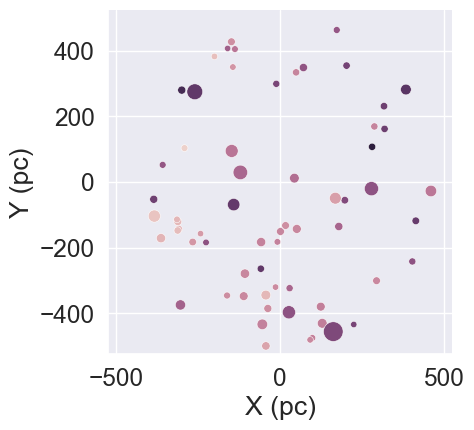

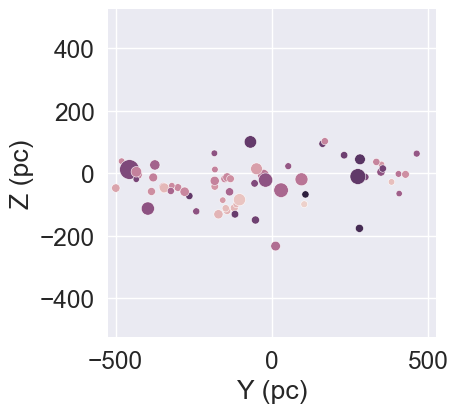

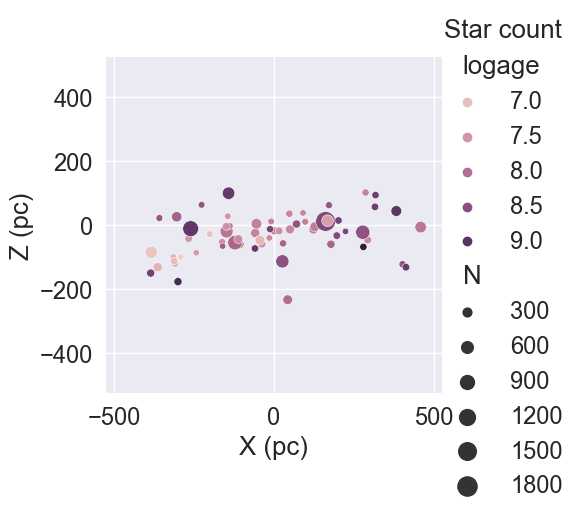

In [7]:
# ---------------------------------
# Cluster location plots
sns.set_theme(context="paper", style="darkgrid")
#dataf = pd.DataFrame(dict(names=names, Star_count=member_stars, u=x.u, v=x.v, w=x.w))

sns.set_theme(context="paper", style="darkgrid")

# XYZ
# -------------------------------
sns.set(font_scale=1.6)
xy = sns.relplot(
    data=dataf, x="skycoord.u", y="skycoord.v", size="N", hue = "logage",
    sizes=(20, 200), legend=False,
).set(xlabel="X (pc)", ylabel="Y (pc)")
xy.ax.set_xlim(-525, 525)
xy.ax.set_ylim(-525, 525)
xy.ax.set_aspect("equal")
# xy.ax.yaxis.grid(True, "minor", linewidth=.25)
#xy.ax.scatter(0, 0, marker="*", color="black", s=50, label="barycenter of the sun")
#xy.despine(left=True, bottom=True)
plt.show()
xy.savefig(output_path+ "XY_plot_seaborn_gal.pdf", dpi=400)
sns.set(font_scale=1.6)
yz = sns.relplot(
    data=dataf, x="skycoord.v", y="skycoord.w", size="N", hue="logage",
    sizes=(20, 200), legend=False).set(xlabel="Y (pc)", ylabel="Z (pc)")
yz.ax.set_xlim(-525, 525)
yz.ax.set_ylim(-525, 525)
yz.ax.set_aspect("equal")
yz.ax.xaxis.grid(True, "minor", linewidth=.25)
yz.ax.yaxis.grid(True, "minor", linewidth=.25)
#yz.ax.scatter(0, 0, marker="*", color="black", s=50, label="barycenter of the sun")
yz.despine(left=True, bottom=True)
plt.show()
yz.savefig(output_path+ "YZ_plot_seaborn_gal.pdf", dpi=400)

sns.set(font_scale=1.55)
xz = sns.relplot(
    data=dataf, x="skycoord.u", y="skycoord.w", size="N", hue = "logage",
    sizes=(20, 200),
).set(xlabel="X (pc)", ylabel="Z (pc)")
#xz.ax.scatter(0, 0, marker="*", color="black", s=50, label="barycenter of the sun")
xz.ax.set_xlim(-525, 525)
xz.ax.set_ylim(-525, 525)
xz.ax.xaxis.grid(True, "minor", linewidth=.25)
xz.ax.yaxis.grid(True, "minor", linewidth=.25)
xz.ax.set_aspect("equal")
xz.despine(left=True, bottom=True)
xz._legend.set_title("Star count")
plt.show()
xz.savefig(output_path + "XZ_plot_seaborn_gal.pdf", dpi=400)

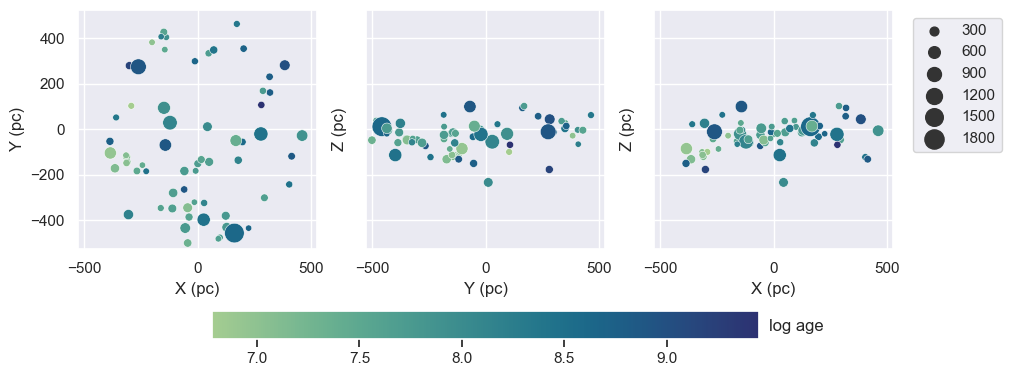

In [56]:

fig, ax = plt.subplots(1,3, layout="constrained")

sns.set_palette("crest")

norm = plt.Normalize(dataf['logage'].min(), dataf['logage'].max())
sm = plt.cm.ScalarMappable(cmap="crest", norm=norm)
sm.set_array([])


xy = sns.scatterplot(
    data=dataf, x="skycoord.u", y="skycoord.v", size="N", hue = "logage", palette = "crest", norm = norm,
    sizes=(20, 200), legend=False, ax = ax[0],
).set(xlabel="X (pc)", ylabel="Y (pc)")
ax[0].set_xlim(-525, 525)
ax[0].set_ylim(-525, 525)
ax[0].set_aspect("equal")

yz = sns.scatterplot(
    data=dataf, x="skycoord.v", y="skycoord.w", size="N", hue="logage", ax = ax[1], norm = norm, palette="crest",
    sizes=(20, 200), legend=False).set(xlabel="Y (pc)", ylabel="Z (pc)")
ax[1].set_xlim(-525, 525)
ax[1].set_ylim(-525, 525)
ax[1].set_aspect("equal")
ax[1].xaxis.grid(True, "minor", linewidth=.25)
ax[1].yaxis.grid(True, "minor", linewidth=.25)
ax[1].yaxis.set_ticklabels([])
#ax[1].despine(left=True, bottom=True)

xz = sns.scatterplot(
    data=dataf, x="skycoord.u", y="skycoord.w", size="N", hue = "logage", legend = True,
    sizes=(20, 200), ax = ax[2], norm= norm, palette="crest",
).set(xlabel="X (pc)", ylabel="Z (pc)")
#xz.ax.scatter(0, 0, marker="*", color="black", s=50, label="barycenter of the sun")
ax[2].set_xlim(-525, 525)
ax[2].set_ylim(-525, 525)
ax[2].xaxis.grid(True, "minor", linewidth=.25)
ax[2].yaxis.grid(True, "minor", linewidth=.25)
ax[2].set_aspect("equal")
#ax[2].spines["left"].set_visible(False)
#ax[2].spines["bottom"].set_visible(False)
#ax[1]._legend.set_title("Star count")
ax[2].yaxis.set_ticklabels([])



# Remove the legend and add a colorbar
#ax[2].get_legend().remove()
c= fig.colorbar(sm, ax=[ax[0],ax[1],ax[2]], location='bottom', fraction = 0.1)
cax = c.ax
cax.text(9.5,0.3,'log age')

handles, labels = ax[2].get_legend_handles_labels()
entries_to_skip = 7
handles = handles[entries_to_skip:]
labels = labels[entries_to_skip:]
#for h in handles[1:]:
#    sizes = [s / 10 for s in h.get_sizes()]
#    h.set_sizes(sizes)
labels = labels[:1] + [f'{int(lab)}' for lab in labels[1:]]
ax[2].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
#ax[2].legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

fig.set_figheight(4)
fig.set_figwidth(10)
sns.set(font_scale=1.2)

plt.show()

fig.savefig(output_path + "XYZ_plot_seaborn_gal.pdf", dpi=500)


#print(labels)